# PPD dos dados para treinamento, validação e teste

In [1]:
##importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from numpy import median, mean
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

* Outlier =  1 normal
* Outlier = -1 anormal

### 01 IMPORTANDO DATASETS

In [2]:
## importando dataset frequencia pivotado
df_freq_trein = pd.read_csv('dataseteh/pp4/eh-freq-trein126.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_trein.shape)
df_freq_trein.head()

(126, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface
0,1,0,0,3.0,2.0,4.0,1.0,6.0,10.0
1,2,1,0,3.0,3.0,5.0,2.0,4.0,10.0
2,3,2,0,3.0,2.0,3.0,2.0,7.0,8.0
3,4,3,0,2.0,3.0,3.0,2.0,5.0,11.0
4,5,4,0,2.0,3.0,2.0,2.0,3.0,4.0


In [3]:
## importando dataset frequencia pivotado
df_dur_trein = pd.read_csv('dataseteh/pp4/eh-dur-trein126.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_trein.shape)
df_dur_trein.head()

(126, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface
0,1,0,0,1319.0,4407.0,1600.0,2684.0,2840.0,2971.0
1,2,1,0,1242.0,7409.0,2122.0,4710.0,1937.0,2659.0
2,3,2,0,1513.0,3845.0,1157.0,6173.0,2800.0,2359.0
3,4,3,0,959.0,7010.0,1400.0,5820.0,2401.0,2862.0
4,5,4,0,947.0,8027.0,846.0,5823.0,1429.0,1066.0


In [4]:
## importando dataset frequencia pivotado
df_dfreq_trein = pd.read_csv('dataseteh/pp4/eh-dfreq-trein126.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_trein.shape)
df_dfreq_trein.head()

(126, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface
0,1,0,0,439.666667,2203.500000,400.000000,2684.0,473.333333,297.100000
1,2,1,0,414.000000,2469.666667,424.400000,2355.0,484.250000,265.900000
2,3,2,0,504.333333,1922.500000,385.666667,3086.5,400.000000,294.875000
3,4,3,0,479.500000,2336.666667,466.666667,2910.0,480.200000,260.181818
4,5,4,0,473.500000,2675.666667,423.000000,2911.5,476.333333,266.500000


In [5]:
## importando datasets
df_dur_test2035 = pd.read_csv('dataseteh/pp4/eh-dur-var20-35-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_test2035.shape)
df_dur_test2035.head()

df_dur_test4055 = pd.read_csv('dataseteh/pp4/eh-dur-var40-55-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_test4055.shape)
df_dur_test4055.head()

df_dur_test6075 = pd.read_csv('dataseteh/pp4/eh-dur-var60-75-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_test6075.shape)
df_dur_test6075.head()

df_dur_test8095 = pd.read_csv('dataseteh/pp4/eh-dur-var80-95-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_test8095.shape)
df_dur_test8095.head()

df_dur_test2095 = pd.read_csv('dataseteh/pp4/eh-dur-var20-95-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_test2095.shape)
df_dur_test2095.head()

df_dur_valid = pd.read_csv('dataseteh/pp4/eh-dur-valid70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_valid.shape)
df_dur_valid.head()

(70, 17)
(70, 17)
(70, 17)
(70, 17)
(70, 17)
(70, 17)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface,var_cclothes,var_eating,var_mcoffe,var_mhotfood,var_toileting,var_whandface,outlier,variacao
0,1,0,0,1017.0,3913.0,890.0,5447.0,2480.0,1558.0,1,1,1,1,1,1,1,0
1,2,1,0,944.0,8073.0,1666.0,2334.0,2203.0,2136.0,1,1,1,1,1,1,1,0
2,3,2,0,1470.0,5348.0,576.0,2430.0,1038.0,1756.0,1,1,1,1,1,1,1,0
3,4,3,0,1335.0,3903.0,1630.0,3026.0,2958.0,2857.0,1,1,1,1,1,1,1,0
4,5,4,0,708.0,8166.0,1353.0,5338.0,2522.0,2391.0,1,1,1,1,1,1,1,0


In [6]:
## importando datasets
df_freq_test2035 = pd.read_csv('dataseteh/pp4/eh-freq-var20-35-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_test2035.shape)
df_freq_test2035.head()

df_freq_test4055 = pd.read_csv('dataseteh/pp4/eh-freq-var40-55-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_test4055.shape)
df_freq_test4055.head()

df_freq_test6075 = pd.read_csv('dataseteh/pp4/eh-freq-var60-75-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_test6075.shape)
df_freq_test6075.head()

df_freq_test8095 = pd.read_csv('dataseteh/pp4/eh-freq-var80-95-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_test8095.shape)
df_freq_test8095.head()

df_freq_test2095 = pd.read_csv('dataseteh/pp4/eh-freq-var20-95-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_test2095.shape)
df_freq_test2095.head()

df_freq_valid = pd.read_csv('dataseteh/pp4/eh-freq-valid70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_valid.shape)
df_freq_valid.head()

(70, 17)
(70, 17)
(70, 17)
(70, 17)
(70, 17)
(70, 17)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface,var_cclothes,var_eating,var_mcoffe,var_mhotfood,var_toileting,var_whandface,outlier,variacao
0,1,0,0,2.0,2.0,2.0,2.0,6.0,6.0,1,1,1,1,1,1,1,0
1,2,1,0,2.0,3.0,4.0,1.0,5.0,8.0,1,1,1,1,1,1,1,0
2,3,2,0,3.0,2.0,1.0,1.0,2.0,8.0,1,1,1,1,1,1,1,0
3,4,3,0,3.0,2.0,3.0,1.0,7.0,11.0,1,1,1,1,1,1,1,0
4,5,4,0,2.0,3.0,3.0,2.0,6.0,9.0,1,1,1,1,1,1,1,0


In [7]:
## importando datasets
df_dfreq_test2035 = pd.read_csv('dataseteh/pp4/eh-dfreq-var20-35-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_test2035.shape)
df_dfreq_test2035.head()

df_dfreq_test4055 = pd.read_csv('dataseteh/pp4/eh-dfreq-var40-55-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_test4055.shape)
df_dfreq_test4055.head()

df_dfreq_test6075 = pd.read_csv('dataseteh/pp4/eh-dfreq-var60-75-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_test6075.shape)
df_dfreq_test6075.head()

df_dfreq_test8095 = pd.read_csv('dataseteh/pp4/eh-dfreq-var80-95-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_test8095.shape)
df_dfreq_test8095.head()

df_dfreq_test2095 = pd.read_csv('dataseteh/pp4/eh-dfreq-var20-95-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_test2095.shape)
df_dfreq_test2095.head()

df_dfreq_valid = pd.read_csv('dataseteh/pp4/eh-dfreq-valid70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_valid.shape)
df_dfreq_valid.head()

(70, 17)
(70, 17)
(70, 17)
(70, 17)
(70, 17)
(70, 17)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface,var_cclothes,var_eating,var_mcoffe,var_mhotfood,var_toileting,var_whandface,outlier,variacao
0,1,0,0,508.5,1956.5,445.000000,2723.5,413.333333,259.666667,1,1,1,1,1,1,1,0
1,2,1,0,472.0,2691.0,416.500000,2334.0,440.600000,267.000000,1,1,1,1,1,1,1,0
2,3,2,0,490.0,2674.0,576.000000,2430.0,519.000000,219.500000,1,1,1,1,1,1,1,0
3,4,3,0,445.0,1951.5,543.333333,3026.0,422.571429,259.727273,1,1,1,1,1,1,1,0
4,5,4,0,354.0,2722.0,451.000000,2669.0,420.333333,265.666667,1,1,1,1,1,1,1,0


## Sepearando atividades individuais

In [8]:
# atividadde 'cclothes'
# dados TREINAMENTO atividade 
# create an Empty DataFrame object
df_cclothes_trein = pd.DataFrame()
df_cclothes_trein['dia'] = df_dur_trein['dia']-1
df_cclothes_trein['dia_semana'] = df_dur_trein['dia_semana']
df_cclothes_trein['fim_semana'] = df_dur_trein['fim_semana']
df_cclothes_trein['duracao'] = df_dur_trein['cclothes']
df_cclothes_trein['frequencia'] = df_freq_trein['cclothes']
df_cclothes_trein['durfreq'] = df_dfreq_trein['cclothes']
df_cclothes_trein['outlier'] = 1
print(df_cclothes_trein.shape)
df_cclothes_trein.head()

# DADOS TESTE
# create an Empty DataFrame object
df_cclothes_test2035 = pd.DataFrame()
df_cclothes_test2035['dia'] = df_dur_test2035['dia']
df_cclothes_test2035['dia_semana'] = df_dur_test2035['dia_semana']
df_cclothes_test2035['fim_semana'] = df_dur_test2035['fim_semana']
df_cclothes_test2035['duracao'] = df_dur_test2035['cclothes']
df_cclothes_test2035['frequencia'] = df_freq_test2035['cclothes']
df_cclothes_test2035['durfreq'] = df_dfreq_test2035['cclothes']
df_cclothes_test2035['outlier'] = np.where(((df_dur_test2035['var_cclothes'] == -1) 
                                             | (df_freq_test2035['var_cclothes'] == -1) | (df_dfreq_test2035['var_cclothes'] == -1)), -1, 1)
print(df_cclothes_test2035.shape)
df_cclothes_test2035.head()

# create an Empty DataFrame object
df_cclothes_test4055 = pd.DataFrame()
df_cclothes_test4055['dia'] = df_dur_test4055['dia']
df_cclothes_test4055['dia_semana'] = df_dur_test4055['dia_semana']
df_cclothes_test4055['fim_semana'] = df_dur_test4055['fim_semana']
df_cclothes_test4055['duracao'] = df_dur_test4055['cclothes']
df_cclothes_test4055['frequencia'] = df_freq_test4055['cclothes']
df_cclothes_test4055['durfreq'] = df_dfreq_test4055['cclothes']
df_cclothes_test4055['outlier'] = np.where(((df_dur_test4055['var_cclothes'] == -1) 
                                             | (df_freq_test4055['var_cclothes'] == -1) | (df_dfreq_test4055['var_cclothes'] == -1)), -1, 1)
print(df_cclothes_test4055.shape)
df_cclothes_test4055.head()


# create an Empty DataFrame object
df_cclothes_test6075 = pd.DataFrame()
df_cclothes_test6075['dia'] = df_dur_test6075['dia']
df_cclothes_test6075['dia_semana'] = df_dur_test6075['dia_semana']
df_cclothes_test6075['fim_semana'] = df_dur_test6075['fim_semana']
df_cclothes_test6075['duracao'] = df_dur_test6075['cclothes']
df_cclothes_test6075['frequencia'] = df_freq_test6075['cclothes']
df_cclothes_test6075['durfreq'] = df_dfreq_test6075['cclothes']
df_cclothes_test6075['outlier'] = np.where(((df_dur_test6075['var_cclothes'] == -1) 
                                             | (df_freq_test6075['var_cclothes'] == -1) | (df_dfreq_test6075['var_cclothes'] == -1)), -1, 1)
print(df_cclothes_test6075.shape)
df_cclothes_test6075.head()

# create an Empty DataFrame object
df_cclothes_test8095 = pd.DataFrame()
df_cclothes_test8095['dia'] = df_dur_test8095['dia']
df_cclothes_test8095['dia_semana'] = df_dur_test8095['dia_semana']
df_cclothes_test8095['fim_semana'] = df_dur_test8095['fim_semana']
df_cclothes_test8095['duracao'] = df_dur_test8095['cclothes']
df_cclothes_test8095['frequencia'] = df_freq_test8095['cclothes']
df_cclothes_test8095['durfreq'] = df_dfreq_test8095['cclothes']
df_cclothes_test8095['outlier'] = np.where(((df_dur_test8095['var_cclothes'] == -1) 
                                             | (df_freq_test8095['var_cclothes'] == -1) | (df_dfreq_test8095['var_cclothes'] == -1)), -1, 1)
print(df_cclothes_test8095.shape)
df_cclothes_test8095.head()

# create an Empty DataFrame object
df_cclothes_test2095 = pd.DataFrame()
df_cclothes_test2095['dia'] = df_dur_test2095['dia']
df_cclothes_test2095['dia_semana'] = df_dur_test2095['dia_semana']
df_cclothes_test2095['fim_semana'] = df_dur_test2095['fim_semana']
df_cclothes_test2095['duracao'] = df_dur_test2095['cclothes']
df_cclothes_test2095['frequencia'] = df_freq_test2095['cclothes']
df_cclothes_test2095['durfreq'] = df_dfreq_test2095['cclothes']
df_cclothes_test2095['outlier'] = np.where(((df_dur_test2095['var_cclothes'] == -1) 
                                             | (df_freq_test2095['var_cclothes'] == -1) | (df_dfreq_test2095['var_cclothes'] == -1)), -1, 1)
print(df_cclothes_test2095.shape)
df_cclothes_test2095.head()

#dados validação
df_cclothes_valid = pd.DataFrame()
df_cclothes_valid['dia'] = df_dur_valid['dia']
df_cclothes_valid['dia_semana'] = df_dur_valid['dia_semana']
df_cclothes_valid['fim_semana'] = df_dur_valid['fim_semana']
df_cclothes_valid['duracao'] = df_dur_valid['cclothes']
df_cclothes_valid['frequencia'] = df_freq_valid['cclothes']
df_cclothes_valid['durfreq'] = df_dfreq_valid['cclothes']
df_cclothes_valid['outlier'] = 1
print(df_cclothes_valid.shape)
df_cclothes_valid.head()


# #exportando os dataset
df_cclothes_trein.to_csv(r'dataseteh/pp4/eh-ativ-cclothes-trein126.csv', sep=';', index=False, decimal=',')
df_cclothes_valid.to_csv(r'dataseteh/pp4/eh-ativ-cclothes-valid70.csv', sep=';', index=False, decimal=',')
df_cclothes_test2035.to_csv(r'dataseteh/pp4/eh-ativ-cclothes-var20-35-test70.csv', sep=';', index=False, decimal=',')
df_cclothes_test4055.to_csv(r'dataseteh/pp4/eh-ativ-cclothes-var40-55-test70.csv', sep=';', index=False, decimal=',')
df_cclothes_test6075.to_csv(r'dataseteh/pp4/eh-ativ-cclothes-var60-75-test70.csv', sep=';', index=False, decimal=',')
df_cclothes_test8095.to_csv(r'dataseteh/pp4/eh-ativ-cclothes-var80-95-test70.csv', sep=';', index=False, decimal=',')
df_cclothes_test2095.to_csv(r'dataseteh/pp4/eh-ativ-cclothes-var20-95-test70.csv', sep=';', index=False, decimal=',')


(126, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)


In [9]:
# atividadde 'eating'
# dados TREINAMENTO atividade 
# create an Empty DataFrame object
df_eating_trein = pd.DataFrame()
df_eating_trein['dia'] = df_dur_trein['dia']-1
df_eating_trein['dia_semana'] = df_dur_trein['dia_semana']
df_eating_trein['fim_semana'] = df_dur_trein['fim_semana']
df_eating_trein['duracao'] = df_dur_trein['eating']
df_eating_trein['frequencia'] = df_freq_trein['eating']
df_eating_trein['durfreq'] = df_dfreq_trein['eating']
df_eating_trein['outlier'] = 1
print(df_eating_trein.shape)
df_eating_trein.head()

# DADOS TESTE
# create an Empty DataFrame object
df_eating_test2035 = pd.DataFrame()
df_eating_test2035['dia'] = df_dur_test2035['dia']
df_eating_test2035['dia_semana'] = df_dur_test2035['dia_semana']
df_eating_test2035['fim_semana'] = df_dur_test2035['fim_semana']
df_eating_test2035['duracao'] = df_dur_test2035['eating']
df_eating_test2035['frequencia'] = df_freq_test2035['eating']
df_eating_test2035['durfreq'] = df_dfreq_test2035['eating']
df_eating_test2035['outlier'] = np.where(((df_dur_test2035['var_eating'] == -1) 
                                             | (df_freq_test2035['var_eating'] == -1) | (df_dfreq_test2035['var_eating'] == -1)), -1, 1)
print(df_eating_test2035.shape)
df_eating_test2035.head(50)

# create an Empty DataFrame object
df_eating_test4055 = pd.DataFrame()
df_eating_test4055['dia'] = df_dur_test4055['dia']
df_eating_test4055['dia_semana'] = df_dur_test4055['dia_semana']
df_eating_test4055['fim_semana'] = df_dur_test4055['fim_semana']
df_eating_test4055['duracao'] = df_dur_test4055['eating']
df_eating_test4055['frequencia'] = df_freq_test4055['eating']
df_eating_test4055['durfreq'] = df_dfreq_test4055['eating']
df_eating_test4055['outlier'] = np.where(((df_dur_test4055['var_eating'] == -1) 
                                             | (df_freq_test4055['var_eating'] == -1) | (df_dfreq_test4055['var_eating'] == -1)), -1, 1)
print(df_eating_test4055.shape)
df_eating_test4055.head(50)


# create an Empty DataFrame object
df_eating_test6075 = pd.DataFrame()
df_eating_test6075['dia'] = df_dur_test6075['dia']
df_eating_test6075['dia_semana'] = df_dur_test6075['dia_semana']
df_eating_test6075['fim_semana'] = df_dur_test6075['fim_semana']
df_eating_test6075['duracao'] = df_dur_test6075['eating']
df_eating_test6075['frequencia'] = df_freq_test6075['eating']
df_eating_test6075['durfreq'] = df_dfreq_test6075['eating']
df_eating_test6075['outlier'] = np.where(((df_dur_test6075['var_eating'] == -1) 
                                             | (df_freq_test6075['var_eating'] == -1) | (df_dfreq_test6075['var_eating'] == -1)), -1, 1)
print(df_eating_test6075.shape)
df_eating_test6075.head(50)

# create an Empty DataFrame object
df_eating_test8095 = pd.DataFrame()
df_eating_test8095['dia'] = df_dur_test8095['dia']
df_eating_test8095['dia_semana'] = df_dur_test8095['dia_semana']
df_eating_test8095['fim_semana'] = df_dur_test8095['fim_semana']
df_eating_test8095['duracao'] = df_dur_test8095['eating']
df_eating_test8095['frequencia'] = df_freq_test8095['eating']
df_eating_test8095['durfreq'] = df_dfreq_test8095['eating']
df_eating_test8095['outlier'] = np.where(((df_dur_test8095['var_eating'] == -1) 
                                             | (df_freq_test8095['var_eating'] == -1) | (df_dfreq_test8095['var_eating'] == -1)), -1, 1)
print(df_eating_test8095.shape)
df_eating_test8095.head(50)

# create an Empty DataFrame object
df_eating_test2095 = pd.DataFrame()
df_eating_test2095['dia'] = df_dur_test2095['dia']
df_eating_test2095['dia_semana'] = df_dur_test2095['dia_semana']
df_eating_test2095['fim_semana'] = df_dur_test2095['fim_semana']
df_eating_test2095['duracao'] = df_dur_test2095['eating']
df_eating_test2095['frequencia'] = df_freq_test2095['eating']
df_eating_test2095['durfreq'] = df_dfreq_test2095['eating']
df_eating_test2095['outlier'] = np.where(((df_dur_test2095['var_eating'] == -1) 
                                             | (df_freq_test2095['var_eating'] == -1) | (df_dfreq_test2095['var_eating'] == -1)), -1, 1)
print(df_eating_test2095.shape)
df_eating_test2095.head(50)

#dados validação
df_eating_valid = pd.DataFrame()
df_eating_valid['dia'] = df_dur_valid['dia']
df_eating_valid['dia_semana'] = df_dur_valid['dia_semana']
df_eating_valid['fim_semana'] = df_dur_valid['fim_semana']
df_eating_valid['duracao'] = df_dur_valid['eating']
df_eating_valid['frequencia'] = df_freq_valid['eating']
df_eating_valid['durfreq'] = df_dfreq_valid['eating']
df_eating_valid['outlier'] = 1
print(df_eating_valid.shape)
df_eating_valid.head()


# #exportando os dataset
df_eating_trein.to_csv(r'dataseteh/pp4/eh-ativ-eating-trein126.csv', sep=';', index=False, decimal=',')
df_eating_valid.to_csv(r'dataseteh/pp4/eh-ativ-eating-valid70.csv', sep=';', index=False, decimal=',')
df_eating_test2035.to_csv(r'dataseteh/pp4/eh-ativ-eating-var20-35-test70.csv', sep=';', index=False, decimal=',')
df_eating_test4055.to_csv(r'dataseteh/pp4/eh-ativ-eating-var40-55-test70.csv', sep=';', index=False, decimal=',')
df_eating_test6075.to_csv(r'dataseteh/pp4/eh-ativ-eating-var60-75-test70.csv', sep=';', index=False, decimal=',')
df_eating_test8095.to_csv(r'dataseteh/pp4/eh-ativ-eating-var80-95-test70.csv', sep=';', index=False, decimal=',')
df_eating_test2095.to_csv(r'dataseteh/pp4/eh-ativ-eating-var20-95-test70.csv', sep=';', index=False, decimal=',')


(126, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)


In [10]:
# atividadde 'mcoffe'
# dados TREINAMENTO atividade 
# create an Empty DataFrame object
df_mcoffe_trein = pd.DataFrame()
df_mcoffe_trein['dia'] = df_dur_trein['dia']-1
df_mcoffe_trein['dia_semana'] = df_dur_trein['dia_semana']
df_mcoffe_trein['fim_semana'] = df_dur_trein['fim_semana']
df_mcoffe_trein['duracao'] = df_dur_trein['mcoffe']
df_mcoffe_trein['frequencia'] = df_freq_trein['mcoffe']
df_mcoffe_trein['durfreq'] = df_dfreq_trein['mcoffe']
df_mcoffe_trein['outlier'] = 1
print(df_mcoffe_trein.shape)
df_mcoffe_trein.head()

# DADOS TESTE
# create an Empty DataFrame object
df_mcoffe_test2035 = pd.DataFrame()
df_mcoffe_test2035['dia'] = df_dur_test2035['dia']
df_mcoffe_test2035['dia_semana'] = df_dur_test2035['dia_semana']
df_mcoffe_test2035['fim_semana'] = df_dur_test2035['fim_semana']
df_mcoffe_test2035['duracao'] = df_dur_test2035['mcoffe']
df_mcoffe_test2035['frequencia'] = df_freq_test2035['mcoffe']
df_mcoffe_test2035['durfreq'] = df_dfreq_test2035['mcoffe']
df_mcoffe_test2035['outlier'] = np.where(((df_dur_test2035['var_mcoffe'] == -1) 
                                             | (df_freq_test2035['var_mcoffe'] == -1) | (df_dfreq_test2035['var_mcoffe'] == -1)), -1, 1)
print(df_mcoffe_test2035.shape)
df_mcoffe_test2035.head(50)

# create an Empty DataFrame object
df_mcoffe_test4055 = pd.DataFrame()
df_mcoffe_test4055['dia'] = df_dur_test4055['dia']
df_mcoffe_test4055['dia_semana'] = df_dur_test4055['dia_semana']
df_mcoffe_test4055['fim_semana'] = df_dur_test4055['fim_semana']
df_mcoffe_test4055['duracao'] = df_dur_test4055['mcoffe']
df_mcoffe_test4055['frequencia'] = df_freq_test4055['mcoffe']
df_mcoffe_test4055['durfreq'] = df_dfreq_test4055['mcoffe']
df_mcoffe_test4055['outlier'] = np.where(((df_dur_test4055['var_mcoffe'] == -1) 
                                             | (df_freq_test4055['var_mcoffe'] == -1) | (df_dfreq_test4055['var_mcoffe'] == -1)), -1, 1)
print(df_mcoffe_test4055.shape)
df_mcoffe_test4055.head(50)


# create an Empty DataFrame object
df_mcoffe_test6075 = pd.DataFrame()
df_mcoffe_test6075['dia'] = df_dur_test6075['dia']
df_mcoffe_test6075['dia_semana'] = df_dur_test6075['dia_semana']
df_mcoffe_test6075['fim_semana'] = df_dur_test6075['fim_semana']
df_mcoffe_test6075['duracao'] = df_dur_test6075['mcoffe']
df_mcoffe_test6075['frequencia'] = df_freq_test6075['mcoffe']
df_mcoffe_test6075['durfreq'] = df_dfreq_test6075['mcoffe']
df_mcoffe_test6075['outlier'] = np.where(((df_dur_test6075['var_mcoffe'] == -1) 
                                             | (df_freq_test6075['var_mcoffe'] == -1) | (df_dfreq_test6075['var_mcoffe'] == -1)), -1, 1)
print(df_mcoffe_test6075.shape)
df_mcoffe_test6075.head(50)

# create an Empty DataFrame object
df_mcoffe_test8095 = pd.DataFrame()
df_mcoffe_test8095['dia'] = df_dur_test8095['dia']
df_mcoffe_test8095['dia_semana'] = df_dur_test8095['dia_semana']
df_mcoffe_test8095['fim_semana'] = df_dur_test8095['fim_semana']
df_mcoffe_test8095['duracao'] = df_dur_test8095['mcoffe']
df_mcoffe_test8095['frequencia'] = df_freq_test8095['mcoffe']
df_mcoffe_test8095['durfreq'] = df_dfreq_test8095['mcoffe']
df_mcoffe_test8095['outlier'] = np.where(((df_dur_test8095['var_mcoffe'] == -1) 
                                             | (df_freq_test8095['var_mcoffe'] == -1) | (df_dfreq_test8095['var_mcoffe'] == -1)), -1, 1)
print(df_mcoffe_test8095.shape)
df_mcoffe_test8095.head(50)

# create an Empty DataFrame object
df_mcoffe_test2095 = pd.DataFrame()
df_mcoffe_test2095['dia'] = df_dur_test2095['dia']
df_mcoffe_test2095['dia_semana'] = df_dur_test2095['dia_semana']
df_mcoffe_test2095['fim_semana'] = df_dur_test2095['fim_semana']
df_mcoffe_test2095['duracao'] = df_dur_test2095['mcoffe']
df_mcoffe_test2095['frequencia'] = df_freq_test2095['mcoffe']
df_mcoffe_test2095['durfreq'] = df_dfreq_test2095['mcoffe']
df_mcoffe_test2095['outlier'] = np.where(((df_dur_test2095['var_mcoffe'] == -1) 
                                             | (df_freq_test2095['var_mcoffe'] == -1) | (df_dfreq_test2095['var_mcoffe'] == -1)), -1, 1)
print(df_mcoffe_test2095.shape)
df_mcoffe_test2095.head(50)

#dados validação
df_mcoffe_valid = pd.DataFrame()
df_mcoffe_valid['dia'] = df_dur_valid['dia']
df_mcoffe_valid['dia_semana'] = df_dur_valid['dia_semana']
df_mcoffe_valid['fim_semana'] = df_dur_valid['fim_semana']
df_mcoffe_valid['duracao'] = df_dur_valid['mcoffe']
df_mcoffe_valid['frequencia'] = df_freq_valid['mcoffe']
df_mcoffe_valid['durfreq'] = df_dfreq_valid['mcoffe']
df_mcoffe_valid['outlier'] = 1
print(df_mcoffe_valid.shape)
df_mcoffe_valid.head()


# #exportando os dataset
df_mcoffe_trein.to_csv(r'dataseteh/pp4/eh-ativ-mcoffe-trein126.csv', sep=';', index=False, decimal=',')
df_mcoffe_valid.to_csv(r'dataseteh/pp4/eh-ativ-mcoffe-valid70.csv', sep=';', index=False, decimal=',')
df_mcoffe_test2035.to_csv(r'dataseteh/pp4/eh-ativ-mcoffe-var20-35-test70.csv', sep=';', index=False, decimal=',')
df_mcoffe_test4055.to_csv(r'dataseteh/pp4/eh-ativ-mcoffe-var40-55-test70.csv', sep=';', index=False, decimal=',')
df_mcoffe_test6075.to_csv(r'dataseteh/pp4/eh-ativ-mcoffe-var60-75-test70.csv', sep=';', index=False, decimal=',')
df_mcoffe_test8095.to_csv(r'dataseteh/pp4/eh-ativ-mcoffe-var80-95-test70.csv', sep=';', index=False, decimal=',')
df_mcoffe_test2095.to_csv(r'dataseteh/pp4/eh-ativ-mcoffe-var20-95-test70.csv', sep=';', index=False, decimal=',')


(126, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)


In [11]:
# atividadde 'mhotfood'
# dados TREINAMENTO atividade 
# create an Empty DataFrame object
df_mhotfood_trein = pd.DataFrame()
df_mhotfood_trein['dia'] = df_dur_trein['dia']-1
df_mhotfood_trein['dia_semana'] = df_dur_trein['dia_semana']
df_mhotfood_trein['fim_semana'] = df_dur_trein['fim_semana']
df_mhotfood_trein['duracao'] = df_dur_trein['mhotfood']
df_mhotfood_trein['frequencia'] = df_freq_trein['mhotfood']
df_mhotfood_trein['durfreq'] = df_dfreq_trein['mhotfood']
df_mhotfood_trein['outlier'] = 1
print(df_mhotfood_trein.shape)
df_mhotfood_trein.head()

# DADOS TESTE
# create an Empty DataFrame object
df_mhotfood_test2035 = pd.DataFrame()
df_mhotfood_test2035['dia'] = df_dur_test2035['dia']
df_mhotfood_test2035['dia_semana'] = df_dur_test2035['dia_semana']
df_mhotfood_test2035['fim_semana'] = df_dur_test2035['fim_semana']
df_mhotfood_test2035['duracao'] = df_dur_test2035['mhotfood']
df_mhotfood_test2035['frequencia'] = df_freq_test2035['mhotfood']
df_mhotfood_test2035['durfreq'] = df_dfreq_test2035['mhotfood']
df_mhotfood_test2035['outlier'] = np.where(((df_dur_test2035['var_mhotfood'] == -1) 
                                             | (df_freq_test2035['var_mhotfood'] == -1) | (df_dfreq_test2035['var_mhotfood'] == -1)), -1, 1)
print(df_mhotfood_test2035.shape)
df_mhotfood_test2035.head(50)

# create an Empty DataFrame object
df_mhotfood_test4055 = pd.DataFrame()
df_mhotfood_test4055['dia'] = df_dur_test4055['dia']
df_mhotfood_test4055['dia_semana'] = df_dur_test4055['dia_semana']
df_mhotfood_test4055['fim_semana'] = df_dur_test4055['fim_semana']
df_mhotfood_test4055['duracao'] = df_dur_test4055['mhotfood']
df_mhotfood_test4055['frequencia'] = df_freq_test4055['mhotfood']
df_mhotfood_test4055['durfreq'] = df_dfreq_test4055['mhotfood']
df_mhotfood_test4055['outlier'] = np.where(((df_dur_test4055['var_mhotfood'] == -1) 
                                             | (df_freq_test4055['var_mhotfood'] == -1) | (df_dfreq_test4055['var_mhotfood'] == -1)), -1, 1)
print(df_mhotfood_test4055.shape)
df_mhotfood_test4055.head(50)


# create an Empty DataFrame object
df_mhotfood_test6075 = pd.DataFrame()
df_mhotfood_test6075['dia'] = df_dur_test6075['dia']
df_mhotfood_test6075['dia_semana'] = df_dur_test6075['dia_semana']
df_mhotfood_test6075['fim_semana'] = df_dur_test6075['fim_semana']
df_mhotfood_test6075['duracao'] = df_dur_test6075['mhotfood']
df_mhotfood_test6075['frequencia'] = df_freq_test6075['mhotfood']
df_mhotfood_test6075['durfreq'] = df_dfreq_test6075['mhotfood']
df_mhotfood_test6075['outlier'] = np.where(((df_dur_test6075['var_mhotfood'] == -1) 
                                             | (df_freq_test6075['var_mhotfood'] == -1) | (df_dfreq_test6075['var_mhotfood'] == -1)), -1, 1)
print(df_mhotfood_test6075.shape)
df_mhotfood_test6075.head(50)

# create an Empty DataFrame object
df_mhotfood_test8095 = pd.DataFrame()
df_mhotfood_test8095['dia'] = df_dur_test8095['dia']
df_mhotfood_test8095['dia_semana'] = df_dur_test8095['dia_semana']
df_mhotfood_test8095['fim_semana'] = df_dur_test8095['fim_semana']
df_mhotfood_test8095['duracao'] = df_dur_test8095['mhotfood']
df_mhotfood_test8095['frequencia'] = df_freq_test8095['mhotfood']
df_mhotfood_test8095['durfreq'] = df_dfreq_test8095['mhotfood']
df_mhotfood_test8095['outlier'] = np.where(((df_dur_test8095['var_mhotfood'] == -1) 
                                             | (df_freq_test8095['var_mhotfood'] == -1) | (df_dfreq_test8095['var_mhotfood'] == -1)), -1, 1)
print(df_mhotfood_test8095.shape)
df_mhotfood_test8095.head(50)

# create an Empty DataFrame object
df_mhotfood_test2095 = pd.DataFrame()
df_mhotfood_test2095['dia'] = df_dur_test2095['dia']
df_mhotfood_test2095['dia_semana'] = df_dur_test2095['dia_semana']
df_mhotfood_test2095['fim_semana'] = df_dur_test2095['fim_semana']
df_mhotfood_test2095['duracao'] = df_dur_test2095['mhotfood']
df_mhotfood_test2095['frequencia'] = df_freq_test2095['mhotfood']
df_mhotfood_test2095['durfreq'] = df_dfreq_test2095['mhotfood']
df_mhotfood_test2095['outlier'] = np.where(((df_dur_test2095['var_mhotfood'] == -1) 
                                             | (df_freq_test2095['var_mhotfood'] == -1) | (df_dfreq_test2095['var_mhotfood'] == -1)), -1, 1)
print(df_mhotfood_test2095.shape)
df_mhotfood_test2095.head(50)

#dados validação
df_mhotfood_valid = pd.DataFrame()
df_mhotfood_valid['dia'] = df_dur_valid['dia']
df_mhotfood_valid['dia_semana'] = df_dur_valid['dia_semana']
df_mhotfood_valid['fim_semana'] = df_dur_valid['fim_semana']
df_mhotfood_valid['duracao'] = df_dur_valid['mhotfood']
df_mhotfood_valid['frequencia'] = df_freq_valid['mhotfood']
df_mhotfood_valid['durfreq'] = df_dfreq_valid['mhotfood']
df_mhotfood_valid['outlier'] = 1
print(df_mhotfood_valid.shape)
df_mhotfood_valid.head()


# #exportando os dataset
df_mhotfood_trein.to_csv(r'dataseteh/pp4/eh-ativ-mhotfood-trein126.csv', sep=';', index=False, decimal=',')
df_mhotfood_valid.to_csv(r'dataseteh/pp4/eh-ativ-mhotfood-valid70.csv', sep=';', index=False, decimal=',')
df_mhotfood_test2035.to_csv(r'dataseteh/pp4/eh-ativ-mhotfood-var20-35-test70.csv', sep=';', index=False, decimal=',')
df_mhotfood_test4055.to_csv(r'dataseteh/pp4/eh-ativ-mhotfood-var40-55-test70.csv', sep=';', index=False, decimal=',')
df_mhotfood_test6075.to_csv(r'dataseteh/pp4/eh-ativ-mhotfood-var60-75-test70.csv', sep=';', index=False, decimal=',')
df_mhotfood_test8095.to_csv(r'dataseteh/pp4/eh-ativ-mhotfood-var80-95-test70.csv', sep=';', index=False, decimal=',')
df_mhotfood_test2095.to_csv(r'dataseteh/pp4/eh-ativ-mhotfood-var20-95-test70.csv', sep=';', index=False, decimal=',')


(126, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)


In [12]:
# atividadde 'toileting'
# dados TREINAMENTO atividade 
# create an Empty DataFrame object
df_toileting_trein = pd.DataFrame()
df_toileting_trein['dia'] = df_dur_trein['dia']-1
df_toileting_trein['dia_semana'] = df_dur_trein['dia_semana']
df_toileting_trein['fim_semana'] = df_dur_trein['fim_semana']
df_toileting_trein['duracao'] = df_dur_trein['toileting']
df_toileting_trein['frequencia'] = df_freq_trein['toileting']
df_toileting_trein['durfreq'] = df_dfreq_trein['toileting']
df_toileting_trein['outlier'] = 1
print(df_toileting_trein.shape)
df_toileting_trein.head()

# DADOS TESTE
# create an Empty DataFrame object
df_toileting_test2035 = pd.DataFrame()
df_toileting_test2035['dia'] = df_dur_test2035['dia']
df_toileting_test2035['dia_semana'] = df_dur_test2035['dia_semana']
df_toileting_test2035['fim_semana'] = df_dur_test2035['fim_semana']
df_toileting_test2035['duracao'] = df_dur_test2035['toileting']
df_toileting_test2035['frequencia'] = df_freq_test2035['toileting']
df_toileting_test2035['durfreq'] = df_dfreq_test2035['toileting']
df_toileting_test2035['outlier'] = np.where(((df_dur_test2035['var_toileting'] == -1) 
                                             | (df_freq_test2035['var_toileting'] == -1) | (df_dfreq_test2035['var_toileting'] == -1)), -1, 1)
print(df_toileting_test2035.shape)
df_toileting_test2035.head(50)

# create an Empty DataFrame object
df_toileting_test4055 = pd.DataFrame()
df_toileting_test4055['dia'] = df_dur_test4055['dia']
df_toileting_test4055['dia_semana'] = df_dur_test4055['dia_semana']
df_toileting_test4055['fim_semana'] = df_dur_test4055['fim_semana']
df_toileting_test4055['duracao'] = df_dur_test4055['toileting']
df_toileting_test4055['frequencia'] = df_freq_test4055['toileting']
df_toileting_test4055['durfreq'] = df_dfreq_test4055['toileting']
df_toileting_test4055['outlier'] = np.where(((df_dur_test4055['var_toileting'] == -1) 
                                             | (df_freq_test4055['var_toileting'] == -1) | (df_dfreq_test4055['var_toileting'] == -1)), -1, 1)
print(df_toileting_test4055.shape)
df_toileting_test4055.head(50)


# create an Empty DataFrame object
df_toileting_test6075 = pd.DataFrame()
df_toileting_test6075['dia'] = df_dur_test6075['dia']
df_toileting_test6075['dia_semana'] = df_dur_test6075['dia_semana']
df_toileting_test6075['fim_semana'] = df_dur_test6075['fim_semana']
df_toileting_test6075['duracao'] = df_dur_test6075['toileting']
df_toileting_test6075['frequencia'] = df_freq_test6075['toileting']
df_toileting_test6075['durfreq'] = df_dfreq_test6075['toileting']
df_toileting_test6075['outlier'] = np.where(((df_dur_test6075['var_toileting'] == -1) 
                                             | (df_freq_test6075['var_toileting'] == -1) | (df_dfreq_test6075['var_toileting'] == -1)), -1, 1)
print(df_toileting_test6075.shape)
df_toileting_test6075.head(50)

# create an Empty DataFrame object
df_toileting_test8095 = pd.DataFrame()
df_toileting_test8095['dia'] = df_dur_test8095['dia']
df_toileting_test8095['dia_semana'] = df_dur_test8095['dia_semana']
df_toileting_test8095['fim_semana'] = df_dur_test8095['fim_semana']
df_toileting_test8095['duracao'] = df_dur_test8095['toileting']
df_toileting_test8095['frequencia'] = df_freq_test8095['toileting']
df_toileting_test8095['durfreq'] = df_dfreq_test8095['toileting']
df_toileting_test8095['outlier'] = np.where(((df_dur_test8095['var_toileting'] == -1) 
                                             | (df_freq_test8095['var_toileting'] == -1) | (df_dfreq_test8095['var_toileting'] == -1)), -1, 1)
print(df_toileting_test8095.shape)
df_toileting_test8095.head(50)

# create an Empty DataFrame object
df_toileting_test2095 = pd.DataFrame()
df_toileting_test2095['dia'] = df_dur_test2095['dia']
df_toileting_test2095['dia_semana'] = df_dur_test2095['dia_semana']
df_toileting_test2095['fim_semana'] = df_dur_test2095['fim_semana']
df_toileting_test2095['duracao'] = df_dur_test2095['toileting']
df_toileting_test2095['frequencia'] = df_freq_test2095['toileting']
df_toileting_test2095['durfreq'] = df_dfreq_test2095['toileting']
df_toileting_test2095['outlier'] = np.where(((df_dur_test2095['var_toileting'] == -1) 
                                             | (df_freq_test2095['var_toileting'] == -1) | (df_dfreq_test2095['var_toileting'] == -1)), -1, 1)
print(df_toileting_test2095.shape)
df_toileting_test2095.head(50)

#dados validação
df_toileting_valid = pd.DataFrame()
df_toileting_valid['dia'] = df_dur_valid['dia']
df_toileting_valid['dia_semana'] = df_dur_valid['dia_semana']
df_toileting_valid['fim_semana'] = df_dur_valid['fim_semana']
df_toileting_valid['duracao'] = df_dur_valid['toileting']
df_toileting_valid['frequencia'] = df_freq_valid['toileting']
df_toileting_valid['durfreq'] = df_dfreq_valid['toileting']
df_toileting_valid['outlier'] = 1
print(df_toileting_valid.shape)
df_toileting_valid.head()


# #exportando os dataset
df_toileting_trein.to_csv(r'dataseteh/pp4/eh-ativ-toileting-trein126.csv', sep=';', index=False, decimal=',')
df_toileting_valid.to_csv(r'dataseteh/pp4/eh-ativ-toileting-valid70.csv', sep=';', index=False, decimal=',')
df_toileting_test2035.to_csv(r'dataseteh/pp4/eh-ativ-toileting-var20-35-test70.csv', sep=';', index=False, decimal=',')
df_toileting_test4055.to_csv(r'dataseteh/pp4/eh-ativ-toileting-var40-55-test70.csv', sep=';', index=False, decimal=',')
df_toileting_test6075.to_csv(r'dataseteh/pp4/eh-ativ-toileting-var60-75-test70.csv', sep=';', index=False, decimal=',')
df_toileting_test8095.to_csv(r'dataseteh/pp4/eh-ativ-toileting-var80-95-test70.csv', sep=';', index=False, decimal=',')
df_toileting_test2095.to_csv(r'dataseteh/pp4/eh-ativ-toileting-var20-95-test70.csv', sep=';', index=False, decimal=',')


(126, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)


In [13]:
# atividadde 'whandface'
# dados TREINAMENTO atividade 
# create an Empty DataFrame object
df_whandface_trein = pd.DataFrame()
df_whandface_trein['dia'] = df_dur_trein['dia']-1
df_whandface_trein['dia_semana'] = df_dur_trein['dia_semana']
df_whandface_trein['fim_semana'] = df_dur_trein['fim_semana']
df_whandface_trein['duracao'] = df_dur_trein['whandface']
df_whandface_trein['frequencia'] = df_freq_trein['whandface']
df_whandface_trein['durfreq'] = df_dfreq_trein['whandface']
df_whandface_trein['outlier'] = 1
print(df_whandface_trein.shape)
df_whandface_trein.head()

# DADOS TESTE
# create an Empty DataFrame object
df_whandface_test2035 = pd.DataFrame()
df_whandface_test2035['dia'] = df_dur_test2035['dia']
df_whandface_test2035['dia_semana'] = df_dur_test2035['dia_semana']
df_whandface_test2035['fim_semana'] = df_dur_test2035['fim_semana']
df_whandface_test2035['duracao'] = df_dur_test2035['whandface']
df_whandface_test2035['frequencia'] = df_freq_test2035['whandface']
df_whandface_test2035['durfreq'] = df_dfreq_test2035['whandface']
df_whandface_test2035['outlier'] = np.where(((df_dur_test2035['var_whandface'] == -1) 
                                             | (df_freq_test2035['var_whandface'] == -1) | (df_dfreq_test2035['var_whandface'] == -1)), -1, 1)
print(df_whandface_test2035.shape)
df_whandface_test2035.head(50)

# create an Empty DataFrame object
df_whandface_test4055 = pd.DataFrame()
df_whandface_test4055['dia'] = df_dur_test4055['dia']
df_whandface_test4055['dia_semana'] = df_dur_test4055['dia_semana']
df_whandface_test4055['fim_semana'] = df_dur_test4055['fim_semana']
df_whandface_test4055['duracao'] = df_dur_test4055['whandface']
df_whandface_test4055['frequencia'] = df_freq_test4055['whandface']
df_whandface_test4055['durfreq'] = df_dfreq_test4055['whandface']
df_whandface_test4055['outlier'] = np.where(((df_dur_test4055['var_whandface'] == -1) 
                                             | (df_freq_test4055['var_whandface'] == -1) | (df_dfreq_test4055['var_whandface'] == -1)), -1, 1)
print(df_whandface_test4055.shape)
df_whandface_test4055.head(50)


# create an Empty DataFrame object
df_whandface_test6075 = pd.DataFrame()
df_whandface_test6075['dia'] = df_dur_test6075['dia']
df_whandface_test6075['dia_semana'] = df_dur_test6075['dia_semana']
df_whandface_test6075['fim_semana'] = df_dur_test6075['fim_semana']
df_whandface_test6075['duracao'] = df_dur_test6075['whandface']
df_whandface_test6075['frequencia'] = df_freq_test6075['whandface']
df_whandface_test6075['durfreq'] = df_dfreq_test6075['whandface']
df_whandface_test6075['outlier'] = np.where(((df_dur_test6075['var_whandface'] == -1) 
                                             | (df_freq_test6075['var_whandface'] == -1) | (df_dfreq_test6075['var_whandface'] == -1)), -1, 1)
print(df_whandface_test6075.shape)
df_whandface_test6075.head(50)

# create an Empty DataFrame object
df_whandface_test8095 = pd.DataFrame()
df_whandface_test8095['dia'] = df_dur_test8095['dia']
df_whandface_test8095['dia_semana'] = df_dur_test8095['dia_semana']
df_whandface_test8095['fim_semana'] = df_dur_test8095['fim_semana']
df_whandface_test8095['duracao'] = df_dur_test8095['whandface']
df_whandface_test8095['frequencia'] = df_freq_test8095['whandface']
df_whandface_test8095['durfreq'] = df_dfreq_test8095['whandface']
df_whandface_test8095['outlier'] = np.where(((df_dur_test8095['var_whandface'] == -1) 
                                             | (df_freq_test8095['var_whandface'] == -1) | (df_dfreq_test8095['var_whandface'] == -1)), -1, 1)
print(df_whandface_test8095.shape)
df_whandface_test8095.head(50)

# create an Empty DataFrame object
df_whandface_test2095 = pd.DataFrame()
df_whandface_test2095['dia'] = df_dur_test2095['dia']
df_whandface_test2095['dia_semana'] = df_dur_test2095['dia_semana']
df_whandface_test2095['fim_semana'] = df_dur_test2095['fim_semana']
df_whandface_test2095['duracao'] = df_dur_test2095['whandface']
df_whandface_test2095['frequencia'] = df_freq_test2095['whandface']
df_whandface_test2095['durfreq'] = df_dfreq_test2095['whandface']
df_whandface_test2095['outlier'] = np.where(((df_dur_test2095['var_whandface'] == -1) 
                                             | (df_freq_test2095['var_whandface'] == -1) | (df_dfreq_test2095['var_whandface'] == -1)), -1, 1)
print(df_whandface_test2095.shape)
df_whandface_test2095.head(50)

#dados validação
df_whandface_valid = pd.DataFrame()
df_whandface_valid['dia'] = df_dur_valid['dia']
df_whandface_valid['dia_semana'] = df_dur_valid['dia_semana']
df_whandface_valid['fim_semana'] = df_dur_valid['fim_semana']
df_whandface_valid['duracao'] = df_dur_valid['whandface']
df_whandface_valid['frequencia'] = df_freq_valid['whandface']
df_whandface_valid['durfreq'] = df_dfreq_valid['whandface']
df_whandface_valid['outlier'] = 1
print(df_whandface_valid.shape)
df_whandface_valid.head()


# #exportando os dataset
df_whandface_trein.to_csv(r'dataseteh/pp4/eh-ativ-whandface-trein126.csv', sep=';', index=False, decimal=',')
df_whandface_valid.to_csv(r'dataseteh/pp4/eh-ativ-whandface-valid70.csv', sep=';', index=False, decimal=',')
df_whandface_test2035.to_csv(r'dataseteh/pp4/eh-ativ-whandface-var20-35-test70.csv', sep=';', index=False, decimal=',')
df_whandface_test4055.to_csv(r'dataseteh/pp4/eh-ativ-whandface-var40-55-test70.csv', sep=';', index=False, decimal=',')
df_whandface_test6075.to_csv(r'dataseteh/pp4/eh-ativ-whandface-var60-75-test70.csv', sep=';', index=False, decimal=',')
df_whandface_test8095.to_csv(r'dataseteh/pp4/eh-ativ-whandface-var80-95-test70.csv', sep=';', index=False, decimal=',')
df_whandface_test2095.to_csv(r'dataseteh/pp4/eh-ativ-whandface-var20-95-test70.csv', sep=';', index=False, decimal=',')


(126, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)
(70, 7)


## AVALIANDO DADOS

In [14]:
# cclothes

In [15]:
df_cclothes_test2035.head()

,dia,dia_semana,fim_semana,duracao,frequencia,durfreq,outlier
0,1,0,0,1017.0,2.0,508.5,1
1,2,1,0,679.0,4.0,169.0,-1
2,3,2,0,970.0,4.0,242.0,-1
3,4,3,0,1642.0,2.0,821.0,-1
4,5,4,0,523.0,4.0,130.0,-1


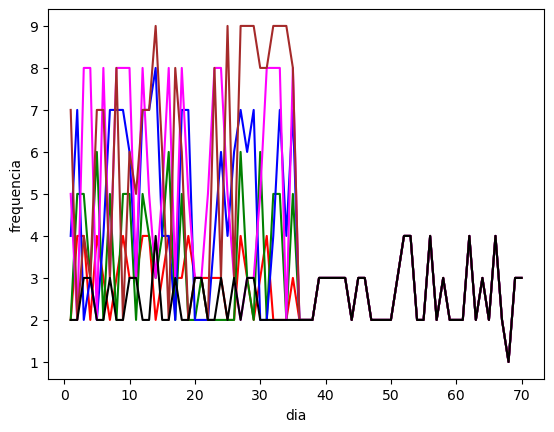

In [16]:
ax = sns.lineplot(x="dia", y="frequencia", data=df_cclothes_test2035, color='red')
ax = sns.lineplot(x="dia", y="frequencia", data=df_cclothes_test4055, color='green')
ax = sns.lineplot(x="dia", y="frequencia", data=df_cclothes_test6075, color='blue')
ax = sns.lineplot(x="dia", y="frequencia", data=df_cclothes_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="frequencia", data=df_cclothes_test2095, color='brown')
ax = sns.lineplot(x="dia", y="frequencia", data=df_cclothes_valid, color='black')

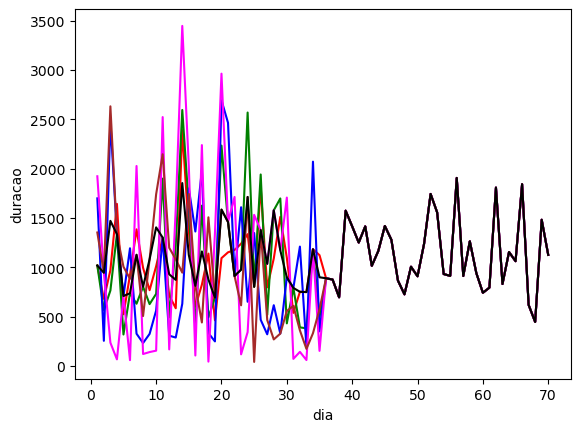

In [17]:
ax = sns.lineplot(x="dia", y="duracao", data=df_cclothes_test2035, color='red')
ax = sns.lineplot(x="dia", y="duracao", data=df_cclothes_test4055, color='green')
ax = sns.lineplot(x="dia", y="duracao", data=df_cclothes_test6075, color='blue')
ax = sns.lineplot(x="dia", y="duracao", data=df_cclothes_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="duracao", data=df_cclothes_test2095, color='brown')
ax = sns.lineplot(x="dia", y="duracao", data=df_cclothes_valid, color='black')

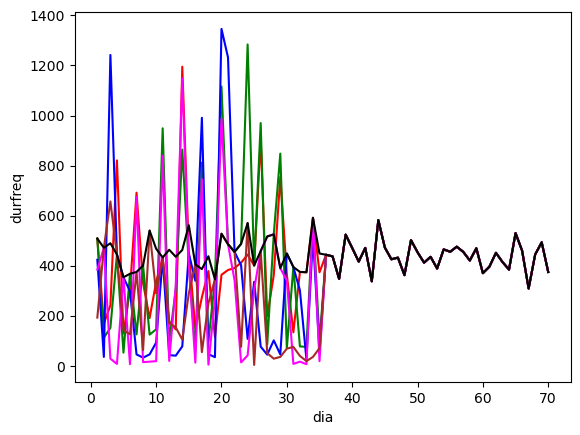

In [18]:
ax = sns.lineplot(x="dia", y="durfreq", data=df_cclothes_test2035, color='red')
ax = sns.lineplot(x="dia", y="durfreq", data=df_cclothes_test4055, color='green')
ax = sns.lineplot(x="dia", y="durfreq", data=df_cclothes_test6075, color='blue')
ax = sns.lineplot(x="dia", y="durfreq", data=df_cclothes_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="durfreq", data=df_cclothes_test2095, color='brown')
ax = sns.lineplot(x="dia", y="durfreq", data=df_cclothes_valid, color='black')

In [19]:
# eating

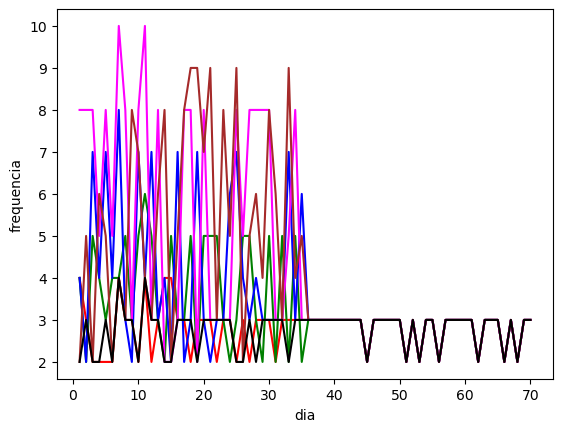

In [20]:
ax = sns.lineplot(x="dia", y="frequencia", data=df_eating_test2035, color='red')
ax = sns.lineplot(x="dia", y="frequencia", data=df_eating_test4055, color='green')
ax = sns.lineplot(x="dia", y="frequencia", data=df_eating_test6075, color='blue')
ax = sns.lineplot(x="dia", y="frequencia", data=df_eating_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="frequencia", data=df_eating_test2095, color='brown')
ax = sns.lineplot(x="dia", y="frequencia", data=df_eating_valid, color='black')

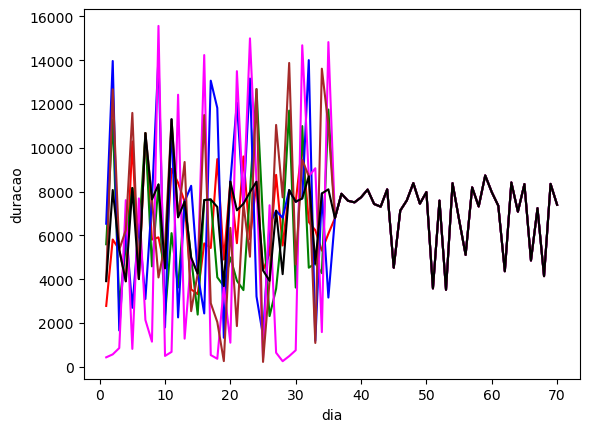

In [21]:
ax = sns.lineplot(x="dia", y="duracao", data=df_eating_test2035, color='red')
ax = sns.lineplot(x="dia", y="duracao", data=df_eating_test4055, color='green')
ax = sns.lineplot(x="dia", y="duracao", data=df_eating_test6075, color='blue')
ax = sns.lineplot(x="dia", y="duracao", data=df_eating_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="duracao", data=df_eating_test2095, color='brown')
ax = sns.lineplot(x="dia", y="duracao", data=df_eating_valid, color='black')

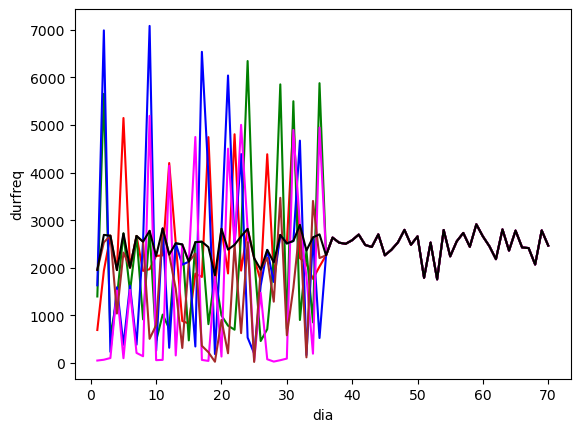

In [22]:
ax = sns.lineplot(x="dia", y="durfreq", data=df_eating_test2035, color='red')
ax = sns.lineplot(x="dia", y="durfreq", data=df_eating_test4055, color='green')
ax = sns.lineplot(x="dia", y="durfreq", data=df_eating_test6075, color='blue')
ax = sns.lineplot(x="dia", y="durfreq", data=df_eating_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="durfreq", data=df_eating_test2095, color='brown')
ax = sns.lineplot(x="dia", y="durfreq", data=df_eating_valid, color='black')

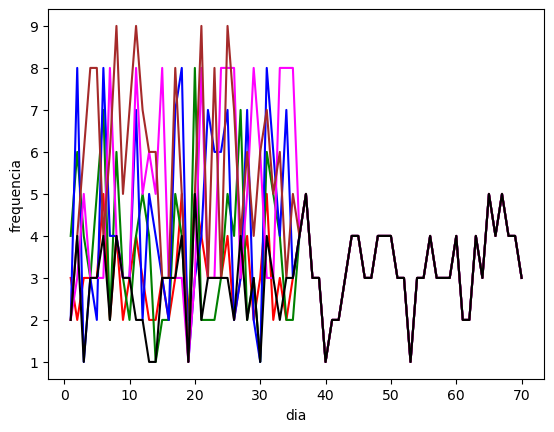

In [23]:
ax = sns.lineplot(x="dia", y="frequencia", data=df_mcoffe_test2035, color='red')
ax = sns.lineplot(x="dia", y="frequencia", data=df_mcoffe_test4055, color='green')
ax = sns.lineplot(x="dia", y="frequencia", data=df_mcoffe_test6075, color='blue')
ax = sns.lineplot(x="dia", y="frequencia", data=df_mcoffe_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="frequencia", data=df_mcoffe_test2095, color='brown')
ax = sns.lineplot(x="dia", y="frequencia", data=df_mcoffe_valid, color='black')

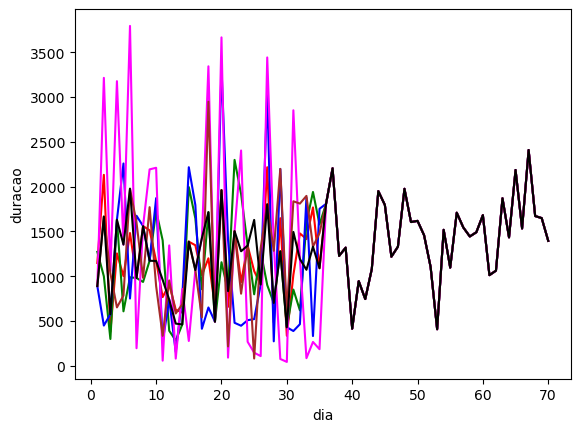

In [24]:
ax = sns.lineplot(x="dia", y="duracao", data=df_mcoffe_test2035, color='red')
ax = sns.lineplot(x="dia", y="duracao", data=df_mcoffe_test4055, color='green')
ax = sns.lineplot(x="dia", y="duracao", data=df_mcoffe_test6075, color='blue')
ax = sns.lineplot(x="dia", y="duracao", data=df_mcoffe_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="duracao", data=df_mcoffe_test2095, color='brown')
ax = sns.lineplot(x="dia", y="duracao", data=df_mcoffe_valid, color='black')

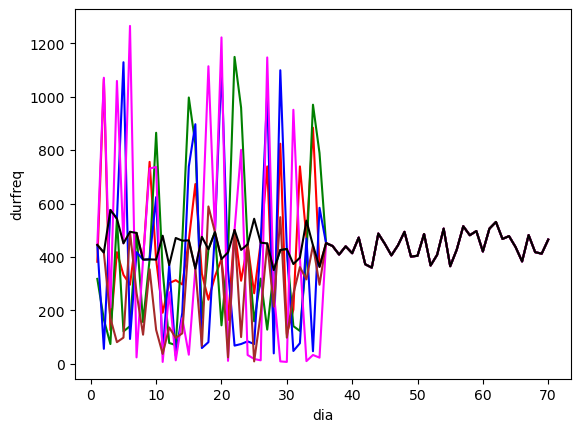

In [25]:
ax = sns.lineplot(x="dia", y="durfreq", data=df_mcoffe_test2035, color='red')
ax = sns.lineplot(x="dia", y="durfreq", data=df_mcoffe_test4055, color='green')
ax = sns.lineplot(x="dia", y="durfreq", data=df_mcoffe_test6075, color='blue')
ax = sns.lineplot(x="dia", y="durfreq", data=df_mcoffe_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="durfreq", data=df_mcoffe_test2095, color='brown')
ax = sns.lineplot(x="dia", y="durfreq", data=df_mcoffe_valid, color='black')

In [26]:
# mhotfood

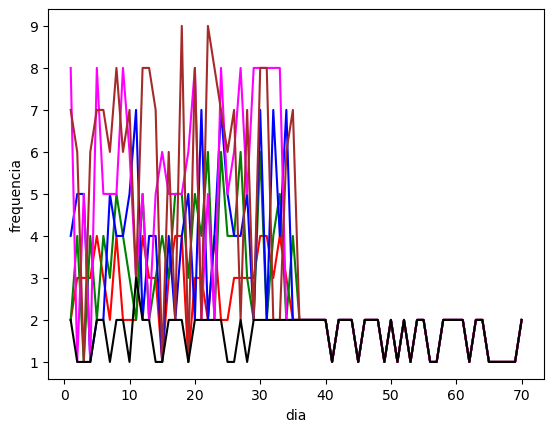

In [27]:
ax = sns.lineplot(x="dia", y="frequencia", data=df_mhotfood_test2035, color='red')
ax = sns.lineplot(x="dia", y="frequencia", data=df_mhotfood_test4055, color='green')
ax = sns.lineplot(x="dia", y="frequencia", data=df_mhotfood_test6075, color='blue')
ax = sns.lineplot(x="dia", y="frequencia", data=df_mhotfood_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="frequencia", data=df_mhotfood_test2095, color='brown')
ax = sns.lineplot(x="dia", y="frequencia", data=df_mhotfood_valid, color='black')

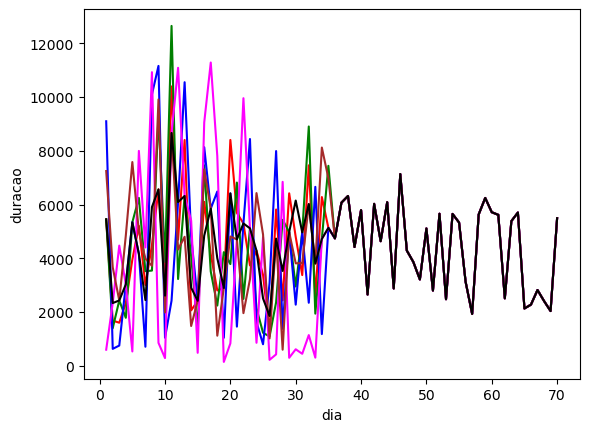

In [28]:
ax = sns.lineplot(x="dia", y="duracao", data=df_mhotfood_test2035, color='red')
ax = sns.lineplot(x="dia", y="duracao", data=df_mhotfood_test4055, color='green')
ax = sns.lineplot(x="dia", y="duracao", data=df_mhotfood_test6075, color='blue')
ax = sns.lineplot(x="dia", y="duracao", data=df_mhotfood_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="duracao", data=df_mhotfood_test2095, color='brown')
ax = sns.lineplot(x="dia", y="duracao", data=df_mhotfood_valid, color='black')

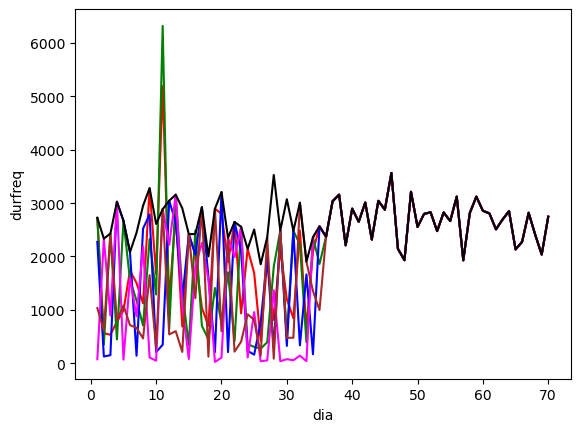

In [29]:
ax = sns.lineplot(x="dia", y="durfreq", data=df_mhotfood_test2035, color='red')
ax = sns.lineplot(x="dia", y="durfreq", data=df_mhotfood_test4055, color='green')
ax = sns.lineplot(x="dia", y="durfreq", data=df_mhotfood_test6075, color='blue')
ax = sns.lineplot(x="dia", y="durfreq", data=df_mhotfood_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="durfreq", data=df_mhotfood_test2095, color='brown')
ax = sns.lineplot(x="dia", y="durfreq", data=df_mhotfood_valid, color='black')

In [30]:
# toileting

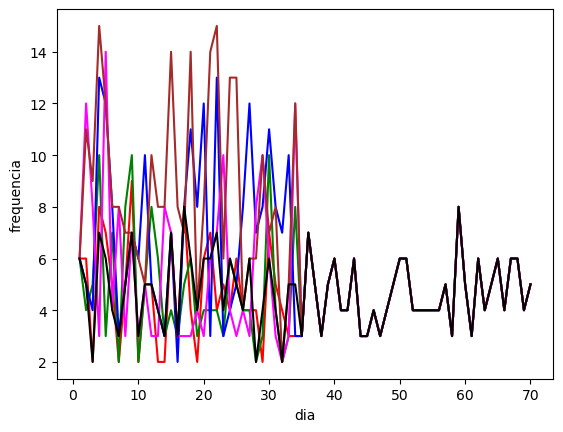

In [31]:
ax = sns.lineplot(x="dia", y="frequencia", data=df_toileting_test2035, color='red')
ax = sns.lineplot(x="dia", y="frequencia", data=df_toileting_test4055, color='green')
ax = sns.lineplot(x="dia", y="frequencia", data=df_toileting_test6075, color='blue')
ax = sns.lineplot(x="dia", y="frequencia", data=df_toileting_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="frequencia", data=df_toileting_test2095, color='brown')
ax = sns.lineplot(x="dia", y="frequencia", data=df_toileting_valid, color='black')

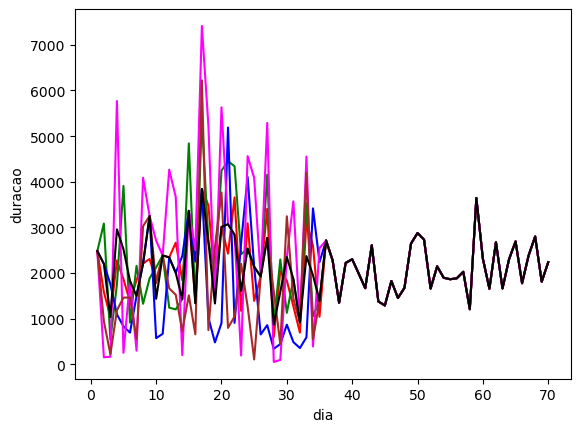

In [32]:
ax = sns.lineplot(x="dia", y="duracao", data=df_toileting_test2035, color='red')
ax = sns.lineplot(x="dia", y="duracao", data=df_toileting_test4055, color='green')
ax = sns.lineplot(x="dia", y="duracao", data=df_toileting_test6075, color='blue')
ax = sns.lineplot(x="dia", y="duracao", data=df_toileting_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="duracao", data=df_toileting_test2095, color='brown')
ax = sns.lineplot(x="dia", y="duracao", data=df_toileting_valid, color='black')

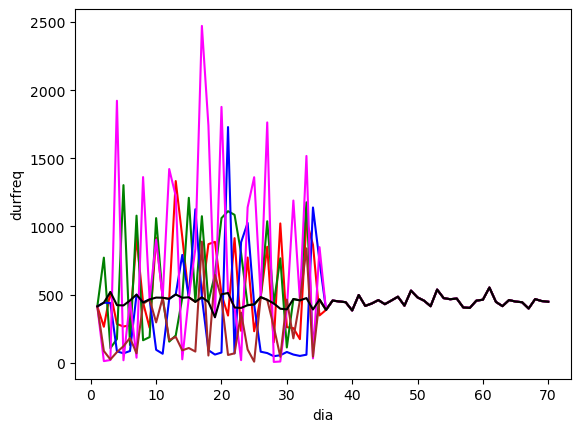

In [33]:
ax = sns.lineplot(x="dia", y="durfreq", data=df_toileting_test2035, color='red')
ax = sns.lineplot(x="dia", y="durfreq", data=df_toileting_test4055, color='green')
ax = sns.lineplot(x="dia", y="durfreq", data=df_toileting_test6075, color='blue')
ax = sns.lineplot(x="dia", y="durfreq", data=df_toileting_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="durfreq", data=df_toileting_test2095, color='brown')
ax = sns.lineplot(x="dia", y="durfreq", data=df_toileting_valid, color='black')

In [34]:
# whandface

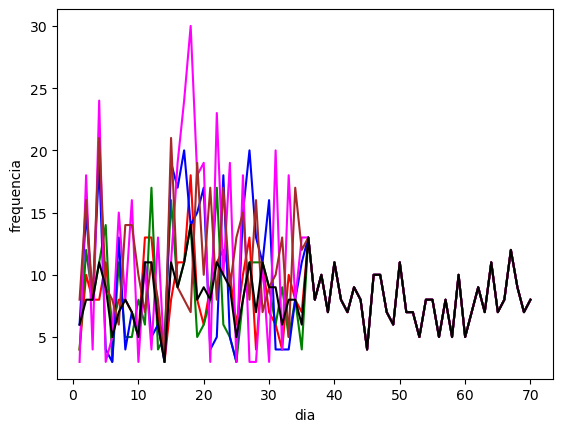

In [35]:
ax = sns.lineplot(x="dia", y="frequencia", data=df_whandface_test2035, color='red')
ax = sns.lineplot(x="dia", y="frequencia", data=df_whandface_test4055, color='green')
ax = sns.lineplot(x="dia", y="frequencia", data=df_whandface_test6075, color='blue')
ax = sns.lineplot(x="dia", y="frequencia", data=df_whandface_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="frequencia", data=df_whandface_test2095, color='brown')
ax = sns.lineplot(x="dia", y="frequencia", data=df_whandface_valid, color='black')

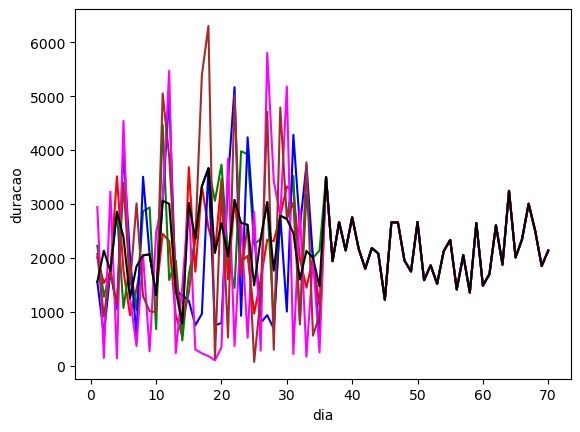

In [36]:
ax = sns.lineplot(x="dia", y="duracao", data=df_whandface_test2035, color='red')
ax = sns.lineplot(x="dia", y="duracao", data=df_whandface_test4055, color='green')
ax = sns.lineplot(x="dia", y="duracao", data=df_whandface_test6075, color='blue')
ax = sns.lineplot(x="dia", y="duracao", data=df_whandface_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="duracao", data=df_whandface_test2095, color='brown')
ax = sns.lineplot(x="dia", y="duracao", data=df_whandface_valid, color='black')

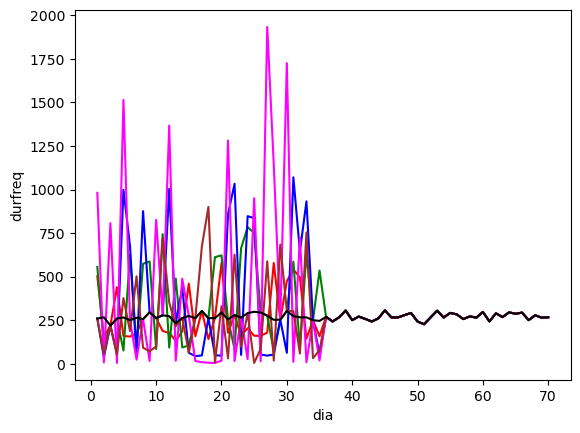

In [37]:
ax = sns.lineplot(x="dia", y="durfreq", data=df_whandface_test2035, color='red')
ax = sns.lineplot(x="dia", y="durfreq", data=df_whandface_test4055, color='green')
ax = sns.lineplot(x="dia", y="durfreq", data=df_whandface_test6075, color='blue')
ax = sns.lineplot(x="dia", y="durfreq", data=df_whandface_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="durfreq", data=df_whandface_test2095, color='brown')
ax = sns.lineplot(x="dia", y="durfreq", data=df_whandface_valid, color='black')

In [38]:
print('DONE')

DONE
